<a href="https://colab.research.google.com/github/maivean/Thesis/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/DistanceLearning_Dataset2.csv')
df.head()

,User,Tweet,Subjectivity,Polarity,Analysis
0,jonesytheteachr,"""Disability conversations: The NCCD and distan...",0,0,Neutral
1,EdTechFam,_Logic: Wondering if TeachLogic microphones ca...,0,0,Neutral
2,suptking,: ALL Madison Seniors take the ACT on October ...,0,0,Neutral
3,gorebitchbuggs,this is 100 AA 100 aim window on a (not acc...,1,0,Positive
4,attyjlynchjr,"_tente _ so one year's results, at the concl...",1,0,Positive


In [4]:
columns=df.columns
columns

Index(['User', 'Tweet', 'Subjectivity', 'Polarity', 'Analysis'], dtype='object')

In [5]:
df.drop(['User','Polarity','Analysis'],axis=1,inplace=True)
df.head()

,Tweet,Subjectivity
0,"""Disability conversations: The NCCD and distan...",0
1,_Logic: Wondering if TeachLogic microphones ca...,0
2,: ALL Madison Seniors take the ACT on October ...,0
3,this is 100 AA 100 aim window on a (not acc...,1
4,"_tente _ so one year's results, at the concl...",1


In [6]:
df.columns=['data','sentiment']
df.head()

,data,sentiment
0,"""Disability conversations: The NCCD and distan...",0
1,_Logic: Wondering if TeachLogic microphones ca...,0
2,: ALL Madison Seniors take the ACT on October ...,0
3,this is 100 AA 100 aim window on a (not acc...,1
4,"_tente _ so one year's results, at the concl...",1


In [7]:
y=df['sentiment']

# **Splitting the dataset in train and test split**

In [8]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (1402,)
DF Test Shape:  (691,)
Y Train Shape:  (1402,)
Y Test Shape:  (691,)


# **Building deep learn model**

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [10]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 4983 number of independent tokens


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(1402, 63)

In [12]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(691, 63)

In [13]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [14]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 63)]              0         
                                                                 
 embedding (Embedding)       (None, 63, 20)            99680     
                                                                 
 conv1d (Conv1D)             (None, 61, 32)            1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 64)            0         
 1D)                                                         

# **Training the Model**

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
15/15 [==============================] - 1s 56ms/step - loss: 1.4183 - accuracy: 0.6234 - val_loss: 1.0276 - val_accuracy: 0.6700
Epoch 2/5
15/15 [==============================] - 0s 17ms/step - loss: 0.8063 - accuracy: 0.6633 - val_loss: 0.6392 - val_accuracy: 0.6700
Epoch 3/5
15/15 [==============================] - 0s 15ms/step - loss: 0.6430 - accuracy: 0.6655 - val_loss: 0.6352 - val_accuracy: 0.6700
Epoch 4/5
15/15 [==============================] - 0s 16ms/step - loss: 0.6081 - accuracy: 0.6633 - val_loss: 0.5983 - val_accuracy: 0.6700
Epoch 5/5
15/15 [==============================] - 0s 18ms/step - loss: 0.5515 - accuracy: 0.6633 - val_loss: 0.5279 - val_accuracy: 0.6773


In [16]:
y_pred=model.predict(data_test)
y_pred

22/22 [==============================] - 0s 2ms/step


array([[6.2822068e-01, 3.7100041e-01, 1.8369796e-04, 4.5149634e-04,
        1.4357982e-04],
       [5.1826859e-01, 4.8042417e-01, 3.1878770e-04, 7.3827594e-04,
        2.5014870e-04],
       [6.2862688e-01, 3.7043625e-01, 2.1614377e-04, 5.4620608e-04,
        1.7445527e-04],
       ...,
       [8.5939783e-01, 1.4051867e-01, 1.6499429e-05, 5.4092015e-05,
        1.2871059e-05],
       [6.3878685e-01, 3.6035585e-01, 2.0202914e-04, 4.9711461e-04,
        1.5821075e-04],
       [6.8304318e-01, 3.1641722e-01, 1.2239825e-04, 3.2014167e-04,
        9.7008087e-05]], dtype=float32)

In [17]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Scoring**

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

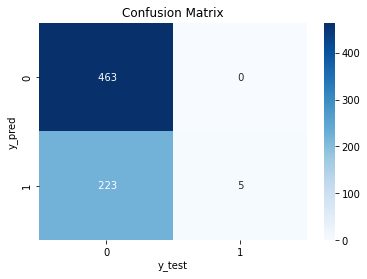

In [19]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81       463
           1       1.00      0.02      0.04       228

    accuracy                           0.68       691
   macro avg       0.84      0.51      0.42       691
weighted avg       0.78      0.68      0.55       691

